## 9)

$e_k = x^{k - 1}$, поэтому несложно посчитать скалярное произведение:

$$\langle e_i, e_j \rangle = \int\limits_{0}^{1}x^{i + j - 2}dx = \frac{1}{i + j - 1}$$

Отсюда, найдем матрицу Грама (Гильберта).

In [5]:
import numpy as np

def get_matrix(n):
    ns = range(1, n + 1)
    matrix = []
    for i in ns:
        matrix.append([])
        for j in ns:
            matrix[-1].append(1.0 / (i + j - 1))
    return np.array(matrix)

In [6]:
get_matrix(5)

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111]])

Классическая функция для построения графиков:

In [7]:
import matplotlib.pyplot as plt

def build_plot(xs, ys, xlabel='', ylabel='', title='', filename='plot', 
               plot_labels=None, color_shapes=None, points=None):
    xs = np.array(xs)
    ys = np.array(ys)
    if xs.ndim == 1:
        xs = np.array([xs])
        ys = np.array([ys])
    if color_shapes is None:
        color_shapes = ['' for _ in range(xs.shape[0] if xs.ndim > 1 else 1)]
    
    plt.clf()
    if points is not None:
        plt.plot(points[0], points[1], 'ro')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    for ind, (x, y) in enumerate(zip(xs, ys)):
        if plot_labels is not None:
            plt.plot(x, y, color_shapes[ind], label=plot_labels[ind])
        else:
            plt.plot(x, y, color_shapes[ind])
    if plot_labels is not None:
        plt.legend()
    plt.show()

Реализаем функцию для вычисления скалярного произведения двух векторов в нашем базисе.

In [13]:
def dot_product(first, second):
    n = first.shape[0]
    A = get_matrix(n)
    ans = 0
    for i, f in enumerate(first):
        for j, s in enumerate(second):
            ans += f * s * A[i][j]
    return ans

In [15]:
dot_product(np.array([1.0, 1.0]), np.array([1.0, 1.0]))

2.3333333333333335

In [45]:
def get_max_eigenvalue(n, iters_num=1000):
    u = np.array([1.0 / np.sqrt(n) for _ in range(n)])
    A = get_matrix(n)
    prev_u = np.zeros(n)
    
    for iter_num in range(iters_num):
        norm = np.linalg.norm(u)
        if norm > 10**9:
            u = u / norm
        prev_u = u.copy()
        u = np.dot(A, u)
    
    return dot_product(u, prev_u) / dot_product(prev_u, prev_u)

Сравним получаенное значение со значением, которое умеет находить `numpy.linalg`

In [46]:
from numpy import linalg as linalg

N = 5

values, _ = linalg.eig(get_matrix(N))
values.sort()
print(get_max_eigenvalue(N), values[-1])

1.567050691098231 1.56705069109823


Построим график зависимости погрешности от числа итераций для $N = 10$ (тут мы возьмем значение из `np.linalg` за эталон, хотя это не посчитанное аналитически значение. Просто предположив, что оно вычисленно достаточно точно, и посмотрим на скорось сходимости):

[1.09325101e-13 2.26674535e-11 2.14743883e-09 1.22896774e-07
 4.72968929e-06 1.28749614e-04 2.53089077e-03 3.57418163e-02
 3.42929548e-01 1.75191967e+00]


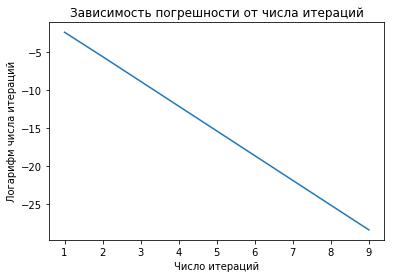

In [57]:
from numpy import linalg as linalg

N = 10

values, _ = linalg.eig(get_matrix(N))
values.sort()
print(values)

iter_nums = range(1, 10)

build_plot(iter_nums, [np.log(np.abs(values[-1] - get_max_eigenvalue(N, iter_num))) for iter_num in iter_nums], 
           'Число итераций',
           'Логарифм числа итераций',
           'Зависимость погрешности от числа итераций')

В данном случае мы очень быстро получаем очень маленькую погрешность (экспоненциально убывающую). Это соответствует теоретической оценке $\mathcal{O}(\frac{\lambda_{p + 1}}{\lambda_1})$, в данном случае это частное очень, так что быстрая сходимость ожидаема.

In [ ]:
Далее будем искать минимальное собственное число. Мы знаем, что наша матрица Грама симметричная.